In [1]:
import cv2
import random
import numpy as np
from sklearn.cluster import KMeans
from typing import List
from src.helpers.dataset import Dataset
from src.helpers.distance import euclidian_distance
import src.helpers.utils as utils

In [2]:
dataset = Dataset()
sift = cv2.SIFT_create()

In [3]:
class NFT:
    feature: np.ndarray

    def __init__(self, collection, image_file):
        self.collection = collection
        self.image_file = image_file

        self.image = dataset.load_image(collection, image_file)
        _, self.descriptors = sift.detectAndCompute(self.image, None)

In [4]:
NFTs = []
for collection in dataset.all_collections():
    for image_file in dataset.collection_images(collection):
        NFTs.append(NFT(collection, image_file))

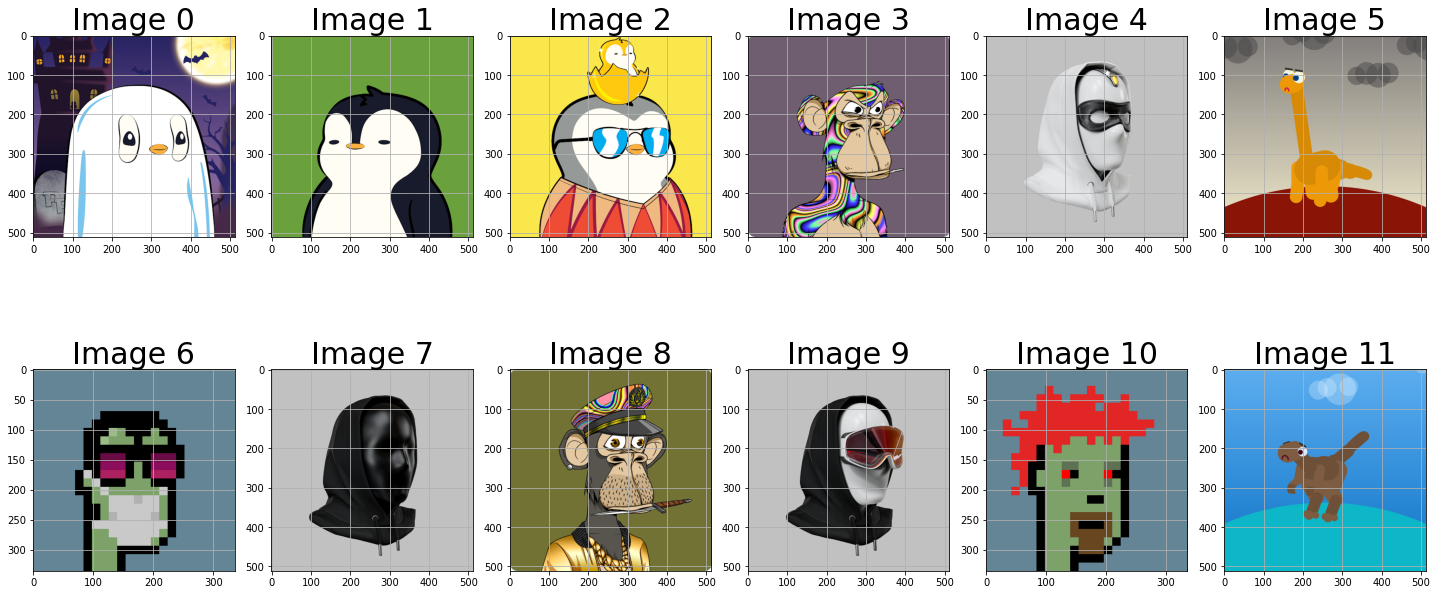

In [5]:
utils.show_image_list(random.choices(list(map(lambda i: i.image, NFTs)), k=12), num_cols=6)

In [6]:
stacked_descriptors = []
for image_descriptors in map(lambda nft: nft.descriptors, NFTs):
    for descriptor in image_descriptors:
        stacked_descriptors.append(descriptor)

In [7]:
n_clusters = 200
k_means = KMeans(n_clusters=n_clusters)
k_means.fit(stacked_descriptors)

KMeans(n_clusters=200)

In [8]:
for nft in NFTs:
    histogram = np.zeros(n_clusters)
    for descriptor in nft.descriptors:
        cluster = k_means.predict([descriptor])[0]
        histogram[cluster] += 1 
    histogram -= np.mean(histogram)
    nft.feature = histogram

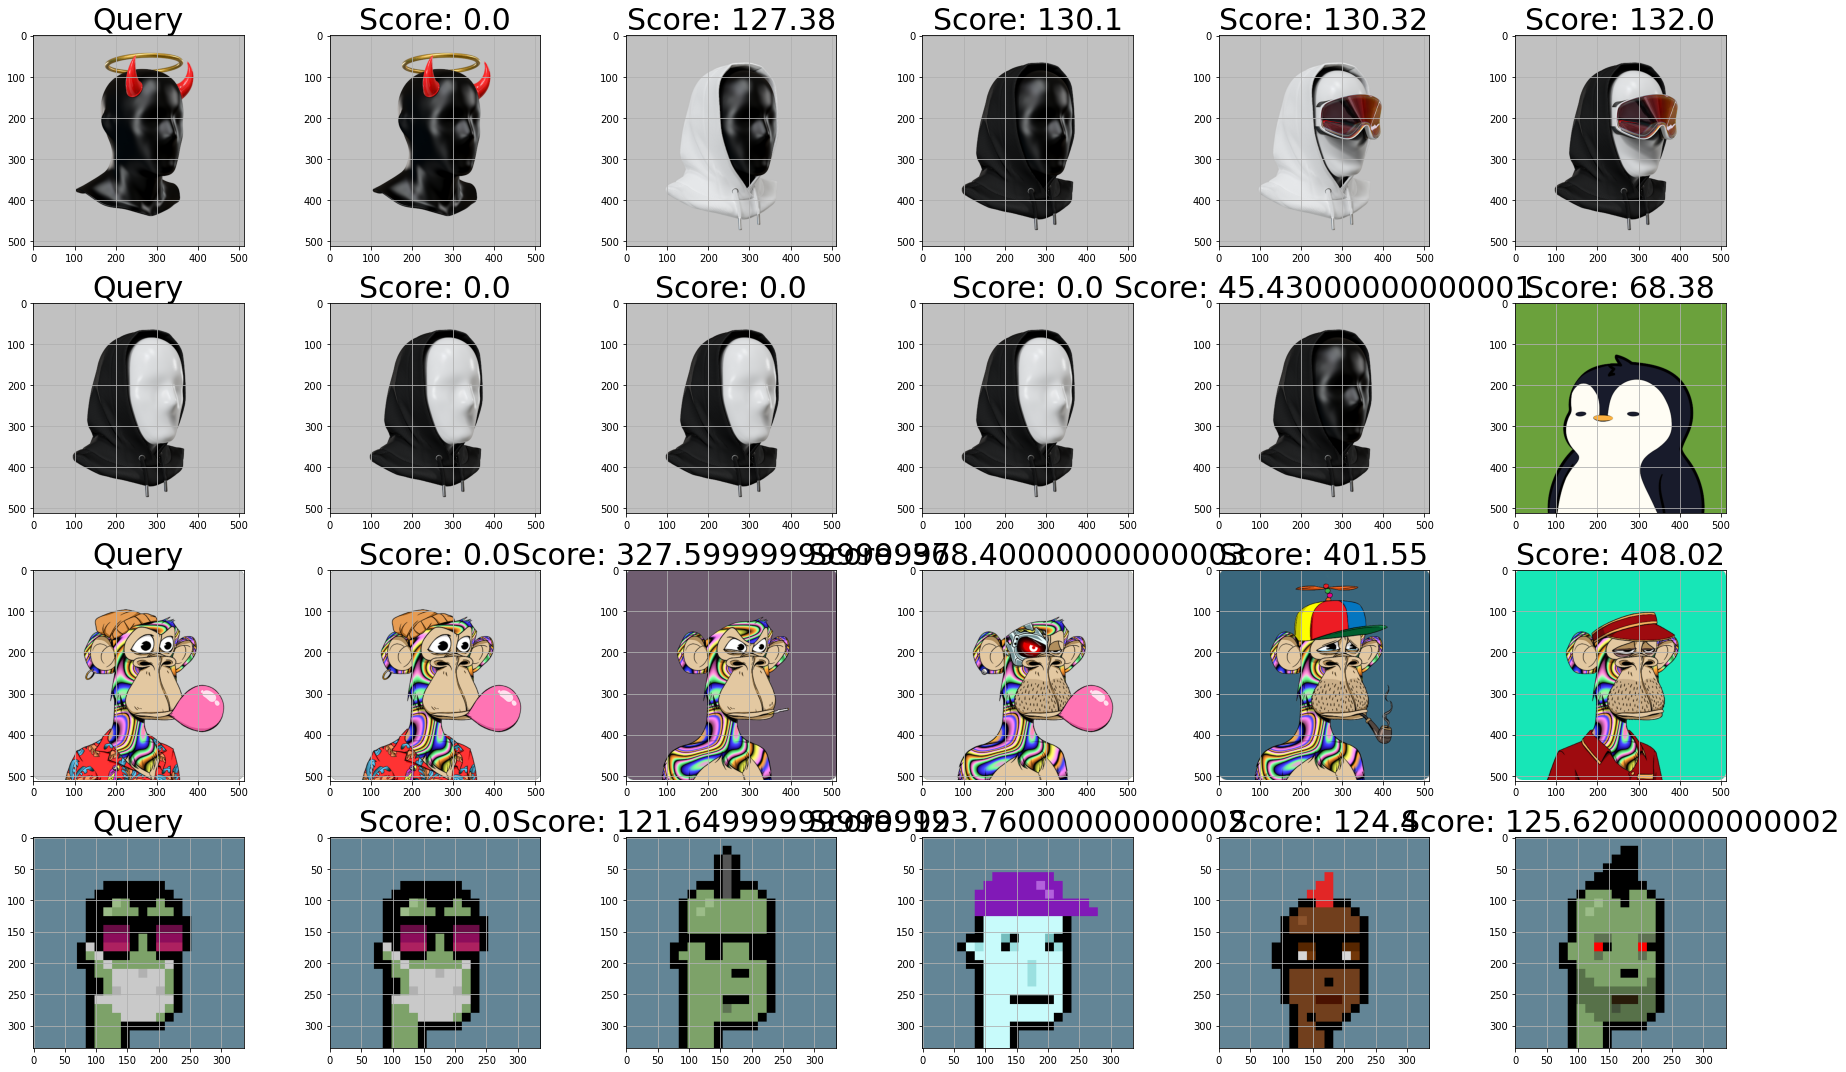

In [11]:

def get_similarities(nft: NFT):
    nft_distances = []
    for nft in NFTs:
        nft_distances.append({
            'nft': nft,
            'distance': np.sum(euclidian_distance(test.feature, nft.feature))
        })

    nft_distances.sort(key=lambda n: n['distance'])
    return nft_distances


preview_images = []
preview_labels = []
for i in range(4):
    test: NFT = random.choice(NFTs)
    nft_distances = get_similarities(test)
    preview_images += [test.image]  + list(map(lambda n: n['nft'].image, nft_distances[:5]))
    preview_labels += ['Query'] + list(map(lambda n: f"Score: {n['distance']}", nft_distances[:5]))
utils.show_image_list(preview_images, preview_labels, num_cols=6, figsize=(25, 15))